In [1]:
from matplotlib import style

In [2]:
style.use('fivethirtyeight')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

In [16]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [18]:
Base = automap_base()

In [19]:
Base.prepare(engine, reflect=True)


In [20]:
Base.classes.keys()

['measurement', 'station']

In [21]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
session = Session(engine)

In [23]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [24]:
results = []
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [25]:
#9.2.2 Save Query Results
df = pd.DataFrame(results, columns=['date','precipitation'])

In [26]:
df.set_index(df['date'], inplace=True)

In [27]:
print(df)

                  date  precipitation
date                                 
2010-01-01  2010-01-01           0.08
2010-01-02  2010-01-02           0.00
2010-01-03  2010-01-03           0.00
2010-01-04  2010-01-04           0.00
2010-01-06  2010-01-06            NaN
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[19550 rows x 2 columns]


In [28]:
print(df.to_string(index=False))

      date  precipitation
2010-01-01           0.08
2010-01-02           0.00
2010-01-03           0.00
2010-01-04           0.00
2010-01-06            NaN
2010-01-07           0.06
2010-01-08           0.00
2010-01-09           0.00
2010-01-10           0.00
2010-01-11           0.01
2010-01-12           0.00
2010-01-14           0.00
2010-01-15           0.00
2010-01-16           0.00
2010-01-17           0.00
2010-01-18           0.00
2010-01-19           0.00
2010-01-20           0.00
2010-01-21           0.00
2010-01-22           0.00
2010-01-23           0.00
2010-01-24           0.01
2010-01-25           0.00
2010-01-26           0.04
2010-01-27           0.12
2010-01-28           0.00
2010-01-30            NaN
2010-01-31           0.03
2010-02-01           0.01
2010-02-03            NaN
2010-02-04           0.01
2010-02-05           0.00
2010-02-06           0.00
2010-02-07           0.00
2010-02-08           0.00
2010-02-09           0.00
2010-02-11           0.00
2010-02-12  

In [29]:
#9.2.3 Sort the DataFrame
df = df.sort_index()

In [30]:
print(df.to_string(index=False))

      date  precipitation
2010-01-01           0.08
2010-01-01           0.21
2010-01-01           0.15
2010-01-01           0.15
2010-01-01           0.05
2010-01-01           0.14
2010-01-01           0.28
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.02
2010-01-02           0.00
2010-01-02           0.00
2010-01-02           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-03           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.00
2010-01-04           0.01
2010-01-05           0.00
2010-01-05           0.00
2010-01-05           0.02
2010-01-05           0.00
2010-01-05           0.00
2010-01-05           0.01
2010-01-06           0.08
2010-01-06           0.01
2010-01-06            NaN
2010-01-06  

<AxesSubplot:xlabel='date'>

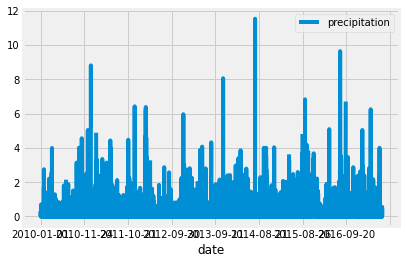

In [31]:
df.plot()

In [32]:
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [34]:
# 9.3.1 Find the Number of Stations
session.query(func.count(Station.station)).all()

[(9)]

In [36]:
#9.3.2 Determine most active stations
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [38]:
#9.3.4 plot the highest number of observations
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [39]:
#Convert the Temperature Observation Results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


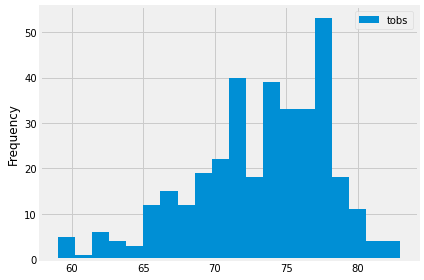

In [42]:
#Plot the Temperature Observations
df.plot.hist(bins=20)
plt.tight_layout()